# Practice Exam 5 - Mixed Tasks
โจทย์: ไฟล์นี้มี 2 ข้อย่อย - (A) Regression และ (B) Classification.
- (A) สร้าง Ridge Regression เพื่อทำนาย 'Y' จาก X1,X2,X3
- (B) สร้าง RandomForestClassifier เพื่อทำนาย 'Label' จาก features และรายงาน feature importances

In [6]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
np.random.seed(3)
N = 150
X1 = np.random.normal(0, 1, N)
X2 = np.random.normal(1, 2, N)
X3 = np.random.normal(-1, 1.5, N)
Y = 2*X1 - 0.5*X2 + 0.3*X3 + np.random.normal(0, 0.5, N)
Label = (Y > Y.mean()).astype(int)
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'Y': Y, 'Label': Label})
print(df.head())

         X1        X2        X3         Y  Label
0  1.788628 -0.724617 -2.544564  3.304476      1
1  0.436510  3.143368 -2.545313 -1.603511      0
2  0.096497 -1.441804 -1.918577  0.820807      1
3 -1.863493  1.119231  1.099948 -3.828505      0
4 -0.277388  1.004888 -2.274411 -1.946022      0


In [8]:
#Regression
xr = df[['X1', 'X2', 'X3']]
yr = df['Y']

xr_train, xr_test, yr_train, yr_test = train_test_split(xr, yr, train_size=0.2, random_state=42)

scaler = StandardScaler()
xr_train = scaler.fit_transform(xr_train)
xr_test = scaler.transform(xr_test)

modelr = Ridge()
modelr.fit(xr_train, yr_train)

yr_pred = modelr.predict(xr_test)

r2 = r2_score(yr_test, yr_pred)
mse = mean_squared_error(yr_test, yr_pred)
mae = mean_absolute_error(yr_test, yr_pred)

print('='*16)
print(f'Prediction = {yr_pred[0]}')
print('='*16)
print(f'R2 = {r2}')
print(f'MSE = {mse}')
print(f'MAE = {mae}')

Prediction = -0.005085342688438299
R2 = 0.9213739206135937
MSE = 0.3863689967867852
MAE = 0.49716354317573636


RandomForest Accuracy: 0.9917
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.98      1.00      0.99        60

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Confusion Matrix:
[[59  1]
 [ 0 60]]
Feature importances (desc):
Y     0.524043
X1    0.367015
X2    0.076138
X3    0.032804
dtype: float64


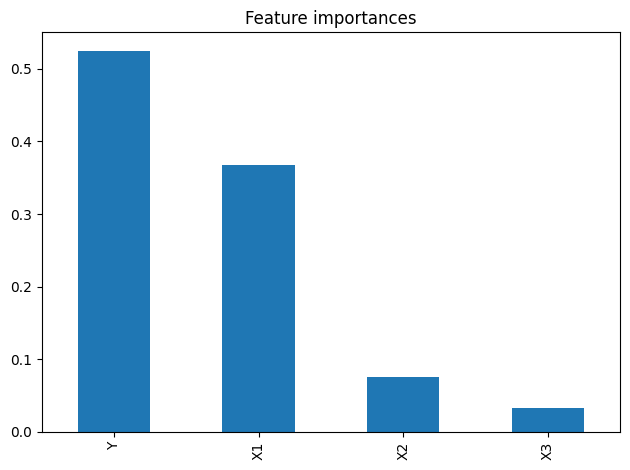

In [13]:
# Classification: RandomForest to predict 'Label'
xc = df.drop('Label', axis=1)
yc = df['Label']

# NOTE: original notebook used train_size=0.2; keep consistent (small training set)
xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, train_size=0.2, random_state=42)

scaler = StandardScaler()
xc_train = scaler.fit_transform(xc_train)
xc_test = scaler.transform(xc_test)

# Train RandomForest
# n_estimators=100: This is a hyperparameter that specifies the number of individual decision trees
# that will be built and combined in the forest.
# Setting it to 100 means the Random Forest will be made up of 100 decision trees.
# Generally, more trees improve stability but increase computation time.

modelc = RandomForestClassifier(n_estimators=100, random_state=42)
modelc.fit(xc_train, yc_train)

# Predict and evaluate
yc_pred = modelc.predict(xc_test)
acc = accuracy_score(yc_test, yc_pred)

print('='*40)
print(f'RandomForest Accuracy: {acc:.4f}')
print('Classification Report:')
print(classification_report(yc_test, yc_pred))
print('Confusion Matrix:')
print(confusion_matrix(yc_test, yc_pred))

# Feature importances (report and plot)
importances = modelc.feature_importances_
feat_names = xc.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
print('='*40)
print('Feature importances (desc):')
print(feat_imp)

try:
    feat_imp.plot(kind='bar')
    plt.title('Feature importances')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f'Could not plot feature importances: {e}')